In [2]:
import pandas as pd

df = pd.read_csv("Amazon_Scraping.csv")

In [6]:
from textblob import TextBlob
import re
from collections import Counter
import pandas as pd

# Perform sentiment analysis using TextBlob
df["Sentiment"] = df["Review"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define a list of price-related keywords
price_keywords = ["price", "expensive", "cheap", "worth", "cost", "overpriced", "value", "affordable", "money", "budget"]

# Extract keywords related to pricing from reviews
def extract_price_keywords(review):
    words = re.findall(r'\b\w+\b', str(review).lower())
    return [word for word in words if word in price_keywords]

df["Price_Keywords"] = df["Review"].apply(extract_price_keywords)

# Filter dataset to only reviews mentioning price-related keywords
df_filtered = df[df["Price_Keywords"].apply(len) > 0]

# Group by Product Model (Style)
product_analysis = df_filtered.groupby("Style").agg(
    Reviews_Count=("Review", "count"),
    Avg_Sentiment=("Sentiment", "mean"),
    Price_Keywords_Count=("Price_Keywords", lambda x: sum(len(k) for k in x))
).reset_index()


In [12]:
product_analysis.head()

,Style,Reviews_Count,Avg_Sentiment,Price_Keywords_Count
0,S25 Ultra,39,0.003846,39
1,iPhone16,19,0.152083,19
2,iPhone16 Pro,120,0.206941,240


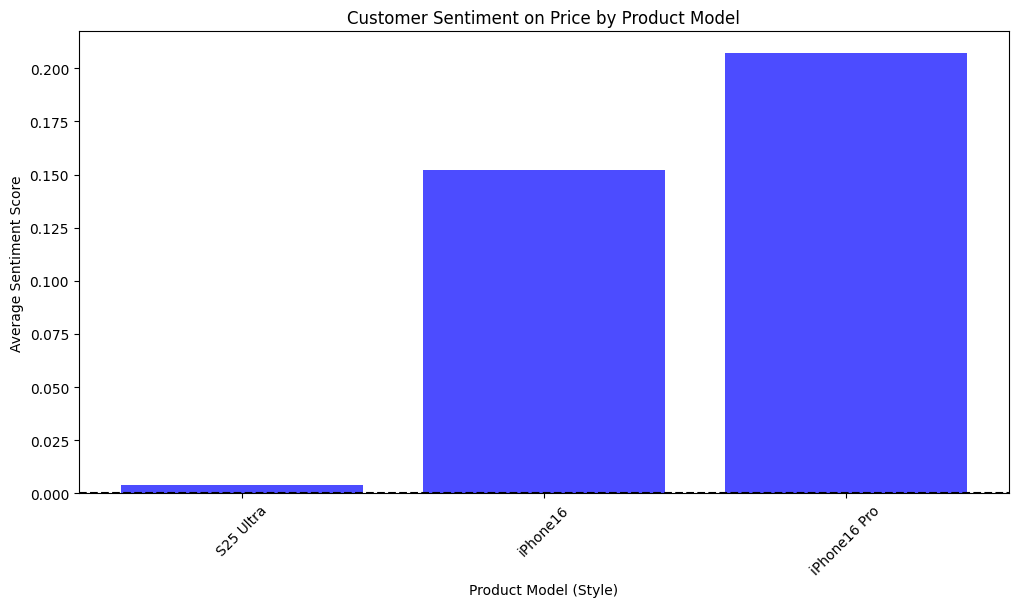

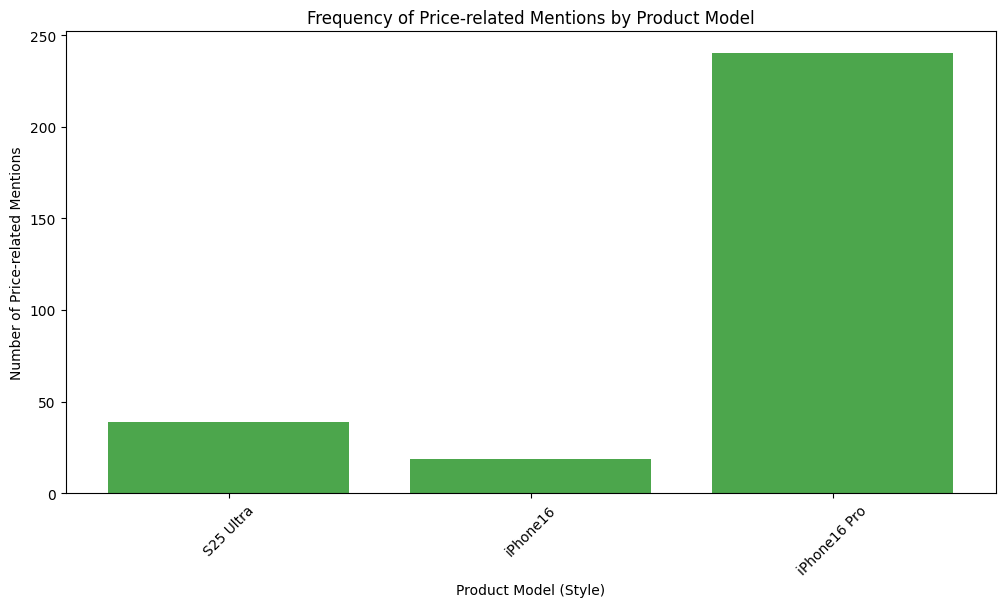

In [13]:
import matplotlib.pyplot as plt

# Plot sentiment analysis by product model
plt.figure(figsize=(12, 6))
plt.bar(product_analysis["Style"], product_analysis["Avg_Sentiment"], color='blue', alpha=0.7)
plt.xlabel("Product Model (Style)")
plt.ylabel("Average Sentiment Score")
plt.title("Customer Sentiment on Price by Product Model")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='dashed')  # Add a line at neutral sentiment (0)
plt.show()

# Plot price-related keyword mentions by product model
plt.figure(figsize=(12, 6))
plt.bar(product_analysis["Style"], product_analysis["Price_Keywords_Count"], color='green', alpha=0.7)
plt.xlabel("Product Model (Style)")
plt.ylabel("Number of Price-related Mentions")
plt.title("Frequency of Price-related Mentions by Product Model")
plt.xticks(rotation=45)
plt.show()
